In [42]:
pip install pandas numpy yfinance keras tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/ed/b6/62345568cd07de5d9254fcf64d7e44aacbb6abde11ea953b3cb320e58d19/tensorflow-2.17.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.17.0 from https://files.pythonhosted.org/packages/66/03/5c447feceb72f5a38ac2aa79d306fa5b5772f982c2b480c1329c7e382900/tensorflow_intel-2.17.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=24.3.25 from https://files.pythonhosted.org/packages/41/f0/7e988a019bc54b2dbd0ad4182ef2d53488bb02e58694cd79d61369e85900/flatbuffers-24.3.25-py2.py3-none-any.whl.metadata
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Obtaining dependency information 

## Import Necessary Libraries

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

### Get the stock data to get started, use the yfincance library to do so

In [17]:
start = '2005-01-01'
end = '2024-01-01'

df = yf.download('AAPL', start=start, end=end)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-01-03,1.156786,1.162679,1.117857,1.130179,0.955513,691992000
2005-01-04,1.139107,1.169107,1.124464,1.141786,0.965326,1096810400
2005-01-05,1.151071,1.165179,1.143750,1.151786,0.973780,680433600
2005-01-06,1.154821,1.159107,1.130893,1.152679,0.974536,705555200
2005-01-07,1.160714,1.243393,1.156250,1.236607,1.045493,2227450400


In [18]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.091385,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.542816,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.642548,48087700
2023-12-28,194.139999,194.660004,193.169998,193.580002,193.071426,34049900
2023-12-29,193.899994,194.399994,191.729996,192.529999,192.024185,42628800


### Change the index to drop the dates column

In [19]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-01-03,1.156786,1.162679,1.117857,1.130179,0.955513,691992000
1,2005-01-04,1.139107,1.169107,1.124464,1.141786,0.965326,1096810400
2,2005-01-05,1.151071,1.165179,1.143750,1.151786,0.973780,680433600
3,2005-01-06,1.154821,1.159107,1.130893,1.152679,0.974536,705555200
4,2005-01-07,1.160714,1.243393,1.156250,1.236607,1.045493,2227450400


In [22]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,1.156786,1.162679,1.117857,1.130179,691992000
1,1.139107,1.169107,1.124464,1.141786,1096810400
2,1.151071,1.165179,1.143750,1.151786,680433600
3,1.154821,1.159107,1.130893,1.152679,705555200
4,1.160714,1.243393,1.156250,1.236607,2227450400


In [24]:
df.tail()

,Open,High,Low,Close,Volume
4776,195.179993,195.410004,192.970001,193.600006,37122800
4777,193.610001,193.889999,192.830002,193.050003,28919300
4778,192.490005,193.500000,191.089996,193.149994,48087700
4779,194.139999,194.660004,193.169998,193.580002,34049900
4780,193.899994,194.399994,191.729996,192.529999,42628800


### Plotting the graph for the closing prices

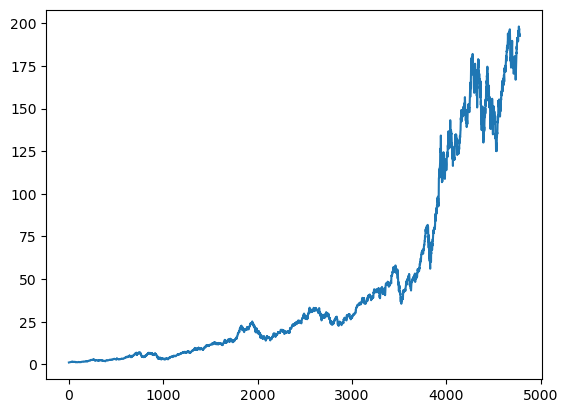

In [23]:
plt.plot(df.Close)

### Calculating the Moving average for 100 days

In [26]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
4776    181.768301
4777    181.787101
4778    181.898701
4779    182.046001
4780    182.173301
Name: Close, Length: 4781, dtype: float64

### Plot the moving average on the closing graph

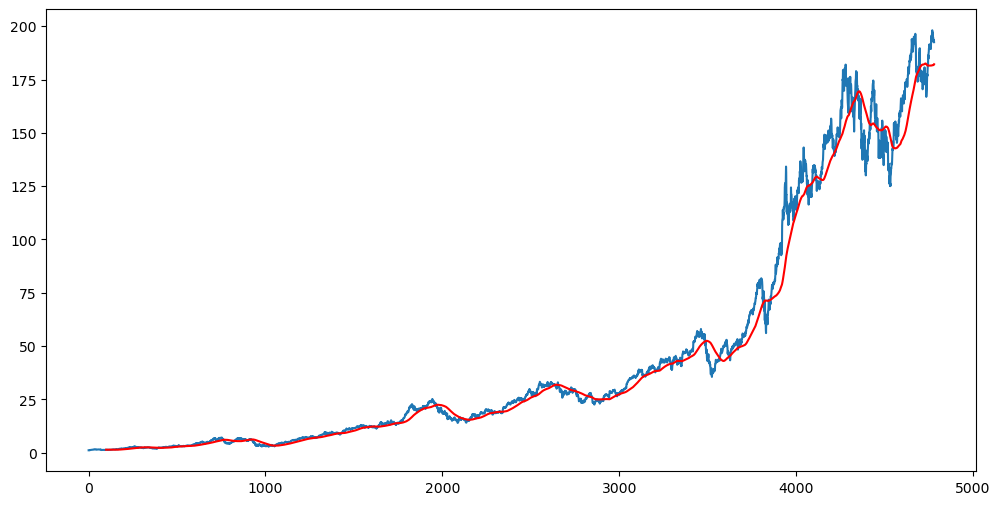

In [27]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

### Calculate the moving average for 200 days

In [28]:
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
4776    178.649100
4777    178.871851
4778    179.085250
4779    179.290201
4780    179.487900
Name: Close, Length: 4781, dtype: float64

### Plot the moving average of 200 days against the moving average of 100 days and closing prices

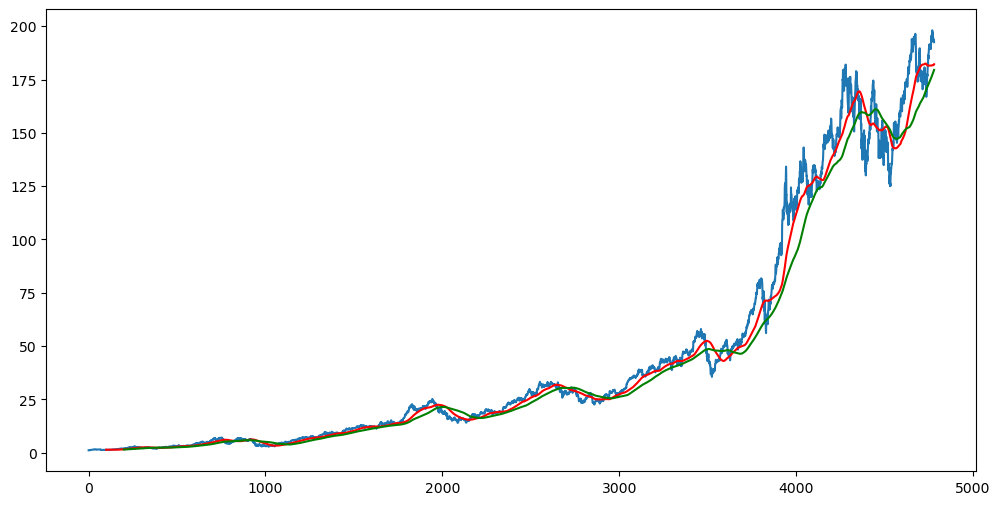

In [29]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [30]:
df.shape

(4781, 5)

### Splitting Data into training and testing data

In [31]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(3346, 1)
(1435, 1)


In [32]:
data_training.head()

,Close
0,1.130179
1,1.141786
2,1.151786
3,1.152679
4,1.236607


In [33]:
data_testing.head()

,Close
3346,43.200001
3347,41.430000
3348,41.310001
3349,40.735001
3350,40.912498


### Scaling down the data to use in the model

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

#### Convert the training data into an array

In [36]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.00000000e+00],
       [2.62008544e-04],
       [4.87742874e-04],
       ...,
       [9.66704189e-01],
       [9.80361119e-01],
       [9.78103722e-01]])

### Split data into x train and y train

In [38]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

## Creating the model

In [46]:
from keras.layers import Dense, Dropout, LSTM, Input
from keras.models import Sequential

In [47]:
model = Sequential()
model.add(Input(shape=(x_train.shape[1], 1)))

model.add(LSTM(units=50, activation='relu', return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [48]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 19s 137ms/step - loss: 0.0460
Epoch 2/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 14s 138ms/step - loss: 0.0058
Epoch 3/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 14s 137ms/step - loss: 0.0060
Epoch 4/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 14s 141ms/step - loss: 0.0053
Epoch 5/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 14s 141ms/step - loss: 0.0054
Epoch 6/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 14s 138ms/step - loss: 0.0045
Epoch 7/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 14s 136ms/step - loss: 0.0042
Epoch 8/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 14s 137ms/step - loss: 0.0050
Epoch 9/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 15s 142ms/step - loss: 0.0038
Epoch 10/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 14s 139ms/step - loss: 0.0041
Epoch 11/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 14s 137ms/step - loss: 0.0040
Epoch 12/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 14s 137ms/step - loss: 0.0034
Epoch 13/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 14s 135ms/step - loss: 0.0038
Epoch 14/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 14s 136ms/step - loss: 0.0035
Epoch 15/50
102

### Save the model

In [50]:
model.save('keras_model.h5')

In [51]:
data_testing.head()

,Close
3346,43.200001
3347,41.430000
3348,41.310001
3349,40.735001
3350,40.912498


In [53]:
data_training.tail(100)

,Close
3246,43.740002
3247,43.742500
3248,43.522499
3249,43.267502
3250,42.369999
...,...
3341,43.535000
3342,43.682499
3343,43.955002
3344,44.560001


In [54]:
past_100_days = data_training.tail(100)

In [57]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [58]:
final_df.head()

,Close
0,43.740002
1,43.742500
2,43.522499
3,43.267502
4,42.369999


In [59]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.05039601],
       [0.05041138],
       [0.04905805],
       ...,
       [0.96948862],
       [0.9721338 ],
       [0.96567473]])

In [60]:
input_data.shape

(1535, 1)

In [61]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [62]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1435, 100, 1)
(1435,)


### Making Predictions

In [63]:
y_predicted = model.predict(x_test)

45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step


In [64]:
y_predicted.shape

(1435, 1)

In [65]:
y_test

array([0.0470742 , 0.03618608, 0.03544791, ..., 0.96948862, 0.9721338 ,
       0.96567473])

In [66]:
y_predicted

array([[0.05573457],
       [0.0556798 ],
       [0.05572602],
       ...,
       [0.9079504 ],
       [0.90771383],
       [0.9073109 ]], dtype=float32)

In [67]:
scaler.scale_

array([0.00615148])

In [68]:
scale_factor = 1/0.00615148
y_predicted = y_predicted * scale_factor 
y_test = y_test * scale_factor

### Plotting the predicted and actual Values

<function matplotlib.pyplot.show(close=None, block=None)>

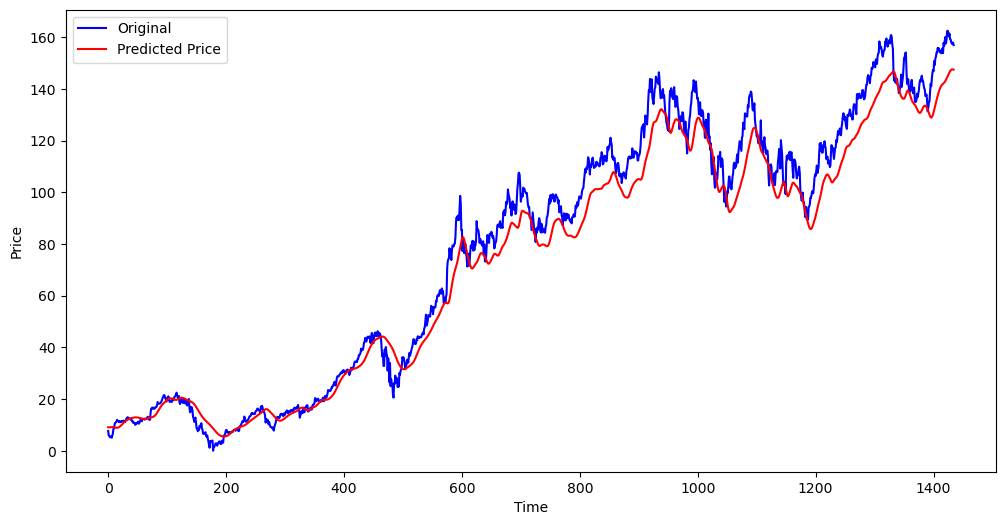

In [69]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = "Original")
plt.plot(y_predicted, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show